In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [36]:
#  To turn off warning messages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv('diabetes.csv')
df.head()

,Kehamilan,Glukosa,TekananDarah,KesehatanKulit,Insulin,BMI,FungsiSilsilahDiabetes,Umur,Diagnosis
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Kehamilan               768 non-null    int64  
 1   Glukosa                 768 non-null    int64  
 2   TekananDarah            768 non-null    int64  
 3   KesehatanKulit          768 non-null    int64  
 4   Insulin                 768 non-null    int64  
 5   BMI                     768 non-null    float64
 6   FungsiSilsilahDiabetes  768 non-null    float64
 7   Umur                    768 non-null    int64  
 8   Diagnosis               768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [39]:
df.shape

(768, 9)

In [40]:
df.isnull().sum()

Kehamilan                 0
Glukosa                   0
TekananDarah              0
KesehatanKulit            0
Insulin                   0
BMI                       0
FungsiSilsilahDiabetes    0
Umur                      0
Diagnosis                 0
dtype: int64

In [41]:
zero_counts = df.eq(0).sum()
print(zero_counts)

Kehamilan                 111
Glukosa                     5
TekananDarah               35
KesehatanKulit            227
Insulin                   374
BMI                        11
FungsiSilsilahDiabetes      0
Umur                        0
Diagnosis                 500
dtype: int64


In [42]:
df

,Kehamilan,Glukosa,TekananDarah,KesehatanKulit,Insulin,BMI,FungsiSilsilahDiabetes,Umur,Diagnosis
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [43]:
df['Glukosa'] = df['Glukosa'].replace(0, np.median(df['Glukosa']))
df['TekananDarah'] = df['TekananDarah'].replace(0, np.median(df['TekananDarah']))
df['KesehatanKulit'] = df['KesehatanKulit'].replace(0, np.median(df['KesehatanKulit']))
df['Insulin'] = df['Insulin'].replace(0, np.median(df['Insulin']))
df['BMI'] = df['BMI'].replace(0, np.median(df['BMI']))

In [44]:
zero_counts = df.eq(0).sum()
print(zero_counts)

Kehamilan                 111
Glukosa                     0
TekananDarah                0
KesehatanKulit              0
Insulin                     0
BMI                         0
FungsiSilsilahDiabetes      0
Umur                        0
Diagnosis                 500
dtype: int64


In [45]:
# Get list of feature columns (excluding target)
feature_columns = [col for col in df.columns if col != 'Diagnosis']

for feature in feature_columns:
    correlation = df[feature].corr(df["Diagnosis"])
    print('Correlation for ', feature, ' = ', correlation)

Correlation for  Kehamilan  =  0.22189815303398638
Correlation for  Glukosa  =  0.4927824039150271
Correlation for  TekananDarah  =  0.16572291308057663
Correlation for  KesehatanKulit  =  0.18906541957539452
Correlation for  Insulin  =  0.1484572381068221
Correlation for  BMI  =  0.3122490266732707
Correlation for  FungsiSilsilahDiabetes  =  0.17384406565296
Correlation for  Umur  =  0.23835598302719785


<Axes: >

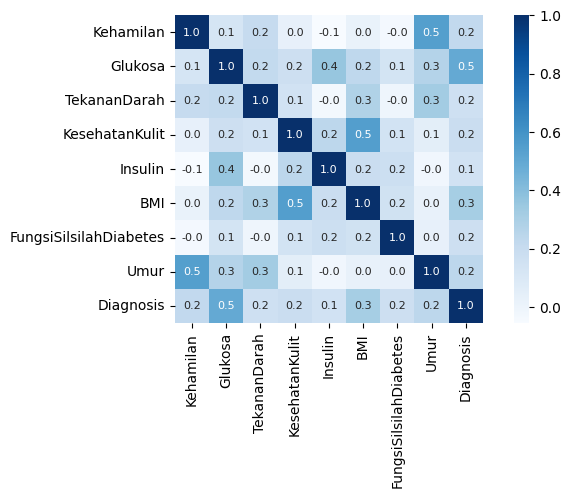

In [46]:
corr = df.corr()
# constructing a heatmap to nderstand the correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, 
            annot_kws={'size':8}, cmap='Blues')

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
X = df.drop(columns='Diagnosis', axis=1)
y = df['Diagnosis']

scalar = StandardScaler()
scalar.fit(X)
X = scalar.transform(X)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
# use many solvers
solvs = ['liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg', 'lbfgs']
for i in solvs:
    x_train, x_test, y_train, y_test = train_test_split(X,y ,test_size = .2, random_state = 0)
    logreg = LogisticRegression(solver = i)
    logreg.fit(x_train,y_train)
    y_pred = logreg.predict(x_test)
    print('Accuracy ',i , ' : ', metrics.accuracy_score(y_test,y_pred))

Accuracy  liblinear  :  0.8181818181818182
Accuracy  lbfgs  :  0.8181818181818182
Accuracy  sag  :  0.8181818181818182
Accuracy  saga  :  0.8181818181818182
Accuracy  newton-cg  :  0.8181818181818182
Accuracy  lbfgs  :  0.8181818181818182


In [51]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [52]:
y_pred = logreg.predict(x_test)
print('Model accuracy = ', metrics.accuracy_score(y_test,y_pred))

Model accuracy =  0.8181818181818182


In [53]:
# Classification Report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
class_report = classification_report(y_test,y_pred)
print("Classification Report for Logistic Regression:\n", class_report)

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154

